In [1]:
import yfinance as yf
import requests

In [2]:
# def find_symbol(company_name):
    
#     url = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords={}&apikey=Y9DN79N2PBBK2X1O'
#     r = requests.get(url.format(company_name))
#     data = r.json()
    
#     if 'bestMatches' in data:
#         best_match = data['bestMatches'][0]
#         symbol = best_match['1. symbol']
#         return symbol
    
#     else:
#         return "No company found"

In [2]:
def inp(company_name):
    inter = company_name.upper()
    inter = inter.split(' ')
    symbol = ''.join(inter)
    symbol += ".NS"
    
    return symbol

In [3]:
def calc(symbol):
    comp = yf.Ticker(symbol)
    all_info = comp.info
    share_price = all_info['currentPrice']
    no_shares = all_info['sharesOutstanding']
    eps = all_info['trailingEps']
    
    market_cap = share_price * no_shares
    pe = market_cap/ (eps * no_shares)
    
    return market_cap, pe

In [4]:
def market_cap_id(market_cap):
    if market_cap < (5000 * (10 **7)):
        return 's' #Small Cap

    elif (5000 * (10 ** 7)) < market_cap < 20000 * (10 ** 7):
        return 'm' #Middle Cap

    else:
           return 'l' #Large Cap

In [5]:
def main(company_name):
    
    '''
    In the first tuple you get market cap, pe ratio
    The second element is if its intresting or not
    1 implies intresting, 0 implies not intresting
    intresting is based on, if it is large cap or not
    '''
    
    symbol = inp(company_name)
    ans = calc(symbol)
    Id = market_cap_id(ans[0])
    
    if Id == 'l':
        id2 = 1
        
    else:
        id2 = 0
    
    return ans,id2

In [45]:
def macd(company_name):

    symbol = inp(company_name)
    comp = yf.Ticker(symbol)
    
    data = comp.history(period='1y', interval='1d')
    
    ma12 = data['Close'].ewm(span=12, adjust=False).mean()
    ma26 = data['Close'].ewm(span=26, adjust=False).mean()
    macd = ma12 - ma26
    sl = macd.ewm(span=9, adjust=False).mean()
    
    histo = macd -sl
    
    data["MACD"] = macd
    data['Signal Line'] = sl
    data['histogram'] = histo 
    
    return data

In [32]:
def rsi(company_name):
    
    symbol = inp(company_name)
    comp = yf.Ticker(symbol)
    
    data = comp.history(period='1y', interval='1d')
    delta = data['Close'].diff()

    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    rs = avg_gain / avg_loss

    data['RSI'] = 100 - (100 / (1 + rs))
    
    
    return data[14:]

In [84]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [81]:
def visualise_macd(data):
    fig, ax1 = plt.subplots(1, figsize=(12,8))
    ax1.plot(data.index, data['MACD'], label='MACD', color='blue', linewidth=1.5)
    ax1.plot(data.index, data['Signal Line'], label='Signal Line', color='red', linestyle='--', linewidth=1.5)
    ax1.bar(data.index, data['MACD'] - data['Signal Line'], color='gray', alpha=0.5, label='MACD Histogram')
    ax1.legend(loc='upper left')
    
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

In [82]:
def visualise_rsi(data):
    
    fig, ax2 = plt.subplots(1, figsize=(12,8))
    ax2.plot(data.index, data['RSI'], label='RSI', color='green', linewidth=1.5)
    ax2.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought threshold
    ax2.axhline(30, linestyle='--', alpha=0.5, color='blue')  # Oversold threshold
    ax2.legend(loc='upper left')
    
    ax2.xaxis.set_major_locator(mdates.MonthLocator())
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    

In [46]:
a = macd('tata motors')

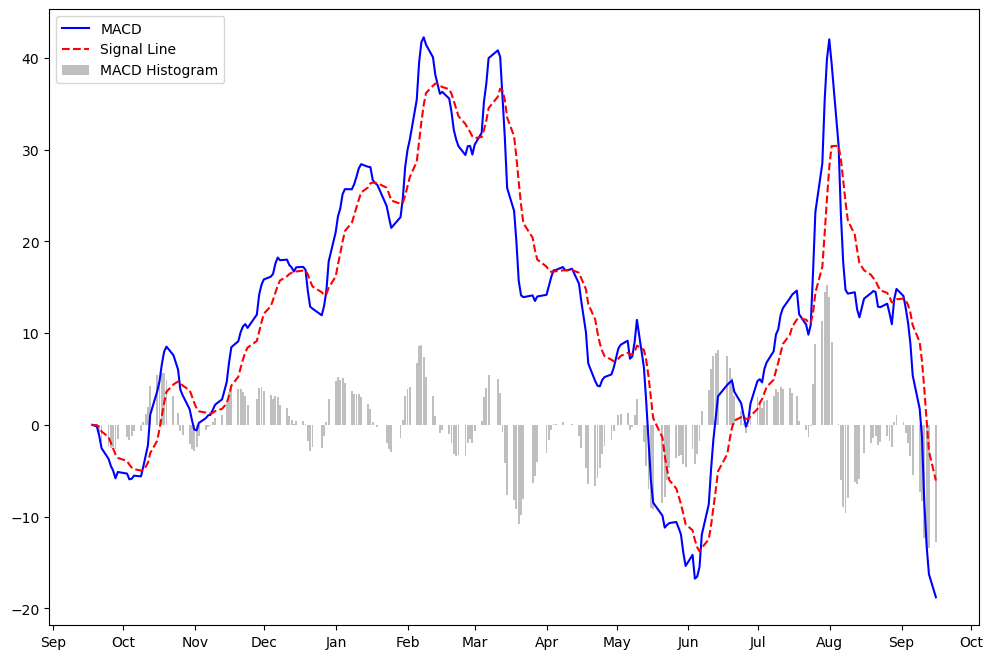

In [85]:
visualise_macd(a);

In [61]:
data2 = rsi('tata motors')

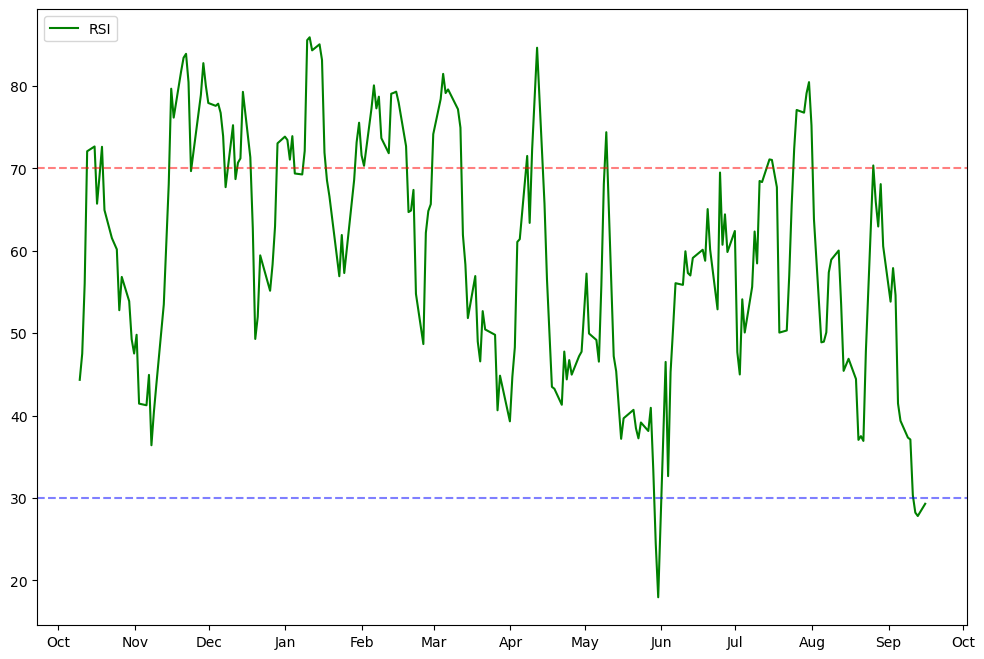

In [86]:
visualise_rsi(data2)